In [ ]:
# 随机梯度下降

In [12]:
from sklearn.utils import shuffle


def perceptron_sgd(X, Y, alpha, epochs):
    """
    参数:
    X -- 自变量数据矩阵
    Y -- 因变量数据矩阵
    alpha -- lamda 参数
    epochs -- 迭代次数

    返回:
    w -- 权重系数
    b -- 截距项
    """
    # 感知机随机梯度下降算法实现
    w = np.zeros(len(X[0]))  # 初始化参数为 0
    b = np.zeros(1)


    # 随机梯度下降计算过程中，每一次迭代更新都需要随机打乱样本数据
    # 要么数据随机，要么选取的点随机？

    # 一次 epochs 就会计算 n 遍？
    for t in range(epochs):  # 迭代
        # 每一次迭代循环打乱训练样本
        # X, Y = shuffle(X, Y)
        for i, x in enumerate(X):
            # 损失值小于 0，即 -x > 0, 此时需要更新参数
            # 基于推导出来的计算公式，进行更新
            # 损失函数：(wx + b) * y
            if ((np.dot(X[i], w) + b) * Y[i]) <= 0:  # 判断条件
                w = w + alpha * X[i] * Y[i]  # 更新参数
                b = b + alpha * Y[i]

    return w, b

In [13]:
import pandas as pd

df = pd.read_csv("./course-12-data.csv", header=0)  # 加载数据集
df.head()  # 预览前 5 行数据

,X0,X1,Y
0,5.1,3.5,-1
1,4.9,3.0,-1
2,4.7,3.2,-1
3,4.6,3.1,-1
4,5.0,3.6,-1


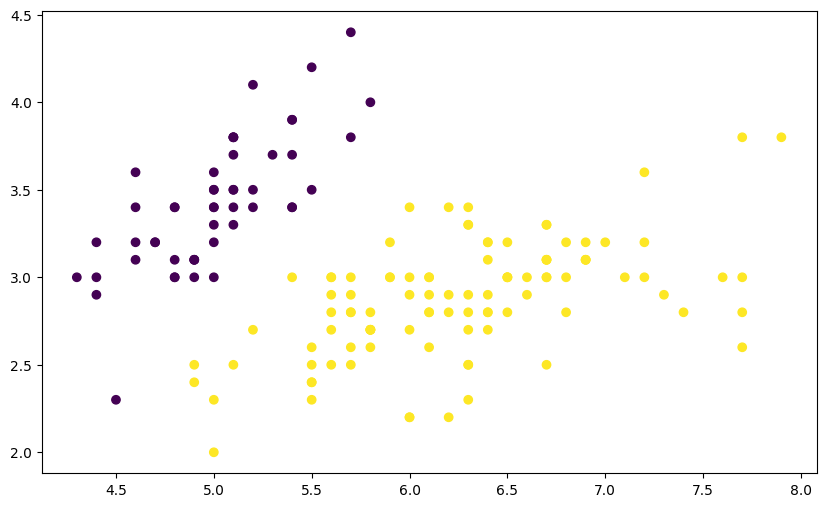

In [14]:
from matplotlib import pyplot as plt

%matplotlib inline

# 绘制数据集
plt.figure(figsize=(10, 6))
plt.scatter(df["X0"], df["X1"], c=df["Y"])

In [20]:
import numpy as np

X = df[["X0", "X1"]].values
Y = df["Y"].values

alpha = 0.1
epochs = 150

perceptron_sgd(X, Y, alpha, epochs) 

(array([ 4.93, -6.98]), array([-3.3]))

In [21]:
# 根据上一步的 w、 b 得到方程
L = perceptron_sgd(X, Y, alpha, epochs)
w1 = L[0][0]
w2 = L[0][1]
b = L[1]

# y = kx + b 计算结果
z = np.dot(X, np.array([w1, w2]).T) + b
np.sign(z)

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [22]:
def perceptron_loss(X, Y, alpha, epochs):
    """
    参数:
    X -- 自变量数据矩阵
    Y -- 因变量数据矩阵
    alpha -- lamda 参数
    epochs -- 迭代次数

    返回:
    loss_list -- 每次迭代损失函数值列表
    """
    # 计算每次迭代后的损失函数值
    w = np.zeros(len(X[0]))  # 初始化参数为 0
    b = np.zeros(1)
    loss_list = []

    for t in range(epochs):  # 迭代
        loss_init = 0
        for i, x in enumerate(X):
            # 每一次迭代循环打乱训练样本
            # X, Y = shuffle(X, Y)
            if ((np.dot(X[i], w) + b) * Y[i]) <= 0:  # 判断条件
                loss_init += (np.dot(X[i], w) + b) * Y[i]
                w = w + alpha * X[i] * Y[i]  # 更新参数
                b = b + alpha * Y[i]
        loss_list.append(loss_init * -1)
    return loss_list

Text(0, 0.5, 'Loss function')

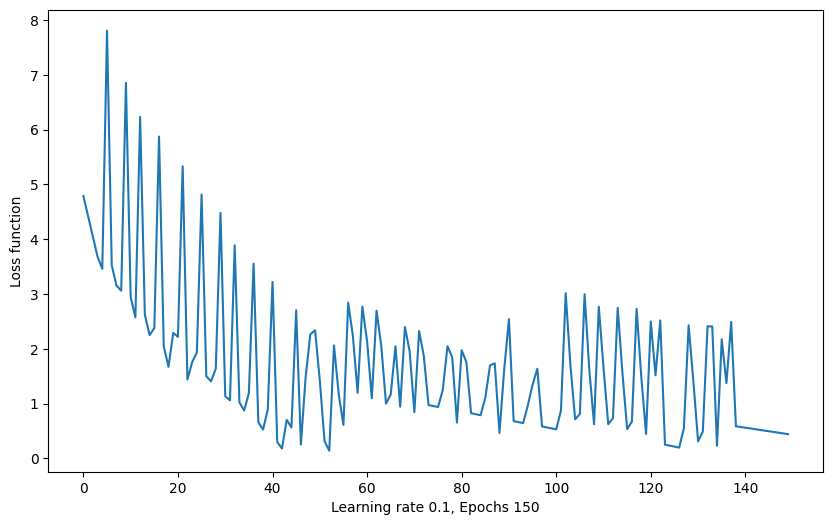

In [23]:
loss_list = perceptron_loss(X, Y, alpha, epochs)

plt.figure(figsize=(10, 6))
plt.plot([i for i in range(len(loss_list))], loss_list)
plt.xlabel("Learning rate {}, Epochs {}".format(alpha, epochs))
plt.ylabel("Loss function")

[ 3.95  -5.035]
[ 3.95  -5.035]


Text(0, 0.5, 'Loss function')

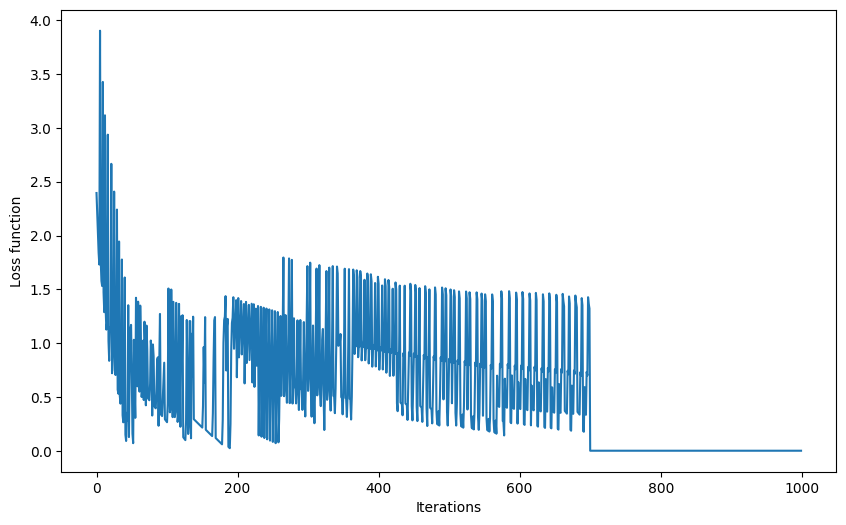

In [24]:
# 按照 0.1 的学习率迭代 150 次后，损失函数依旧无法到达 0
# 根据数据可知是线性可分的，所以是
# 1.学习率设置太大了，导致反复横跳
# 2.迭代次数不足以到达0

alpha = 0.05  # 减小学习率
epochs = 1000  # 增加迭代次数

loss_list = perceptron_loss(X, Y, alpha, epochs)

# Flatten the arrays in loss_list
flattened_loss = [
    item[0] if isinstance(item, np.ndarray) else item for item in loss_list
]

plt.figure(figsize=(10, 6))
plt.plot(range(len(flattened_loss)), flattened_loss)
plt.xlabel("Iterations")
plt.ylabel("Loss function")
# 到一定程度后，loss 为 0

In [26]:
from sklearn.metrics import accuracy_score

L = perceptron_sgd(X, Y, alpha, epochs)
z = np.dot(X, L[0].T) + L[1]
accuracy_score(Y, np.sign(z))

1.0

In [ ]:
# 人工神经网络

In [28]:
def sigmoid(x):
    # sigmoid 函数
    return 1 / (1 + np.exp(-x))


def sigmoid_derivative(x):
    # sigmoid 函数求导
    return sigmoid(x) * (1 - sigmoid(x))

In [29]:
# 前向传播
X = np.array([[1, 1]])
y = np.array([[1]])

X, y

(array([[1, 1]]), array([[1]]))

In [30]:
# 随机初始化隐含层权重
W1 = np.random.rand(2, 3)
W2 = np.random.rand(3, 1)

W1, W2

(array([[0.33438694, 0.10483794, 0.92510965],
        [0.53173838, 0.82123567, 0.08777797]]),
 array([[0.97231409],
        [0.59461586],
        [0.55484772]]))

In [31]:
input_layer = X  # 输入层
hidden_layer = sigmoid(np.dot(input_layer, W1))  # 隐含层，公式 20
output_layer = sigmoid(np.dot(hidden_layer, W2))  # 输出层，公式 22

output_layer

array([[0.8201535]])

In [32]:
# 前向传播得到了结果
# 通过损失函数，对节点求偏导，计算 w 的更新值

# 公式 24
d_W2 = np.dot(
    hidden_layer.T,
    (2 * (output_layer - y) * sigmoid_derivative(np.dot(hidden_layer, W2))),
)

# 公式 25
d_W1 = np.dot(
    input_layer.T,
    (
        np.dot(
            2 * (output_layer - y) * sigmoid_derivative(np.dot(hidden_layer, W2)), W2.T
        )
        * sigmoid_derivative(np.dot(input_layer, W1))
    ),
)

d_W2, d_W1

(array([[-0.03734772],
        [-0.03800238],
        [-0.0389206 ]]),
 array([[-0.01075108, -0.00641121, -0.00575324],
        [-0.01075108, -0.00641121, -0.00575324]]))

In [33]:
# 梯度下降更新权重, 学习率为 0.05

W1 -= 0.05 * d_W1  # 如果上面是 y - output_layer，则改成 +=
W2 -= 0.05 * d_W2

W2, W1

(array([[0.97418148],
        [0.59651597],
        [0.55679375]]),
 array([[0.3349245 , 0.1051585 , 0.92539731],
        [0.53227593, 0.82155623, 0.08806563]]))

In [34]:
# 示例神经网络完整实现
class NeuralNetwork:
    # 初始化参数
    def __init__(self, X, y, lr):
        self.input_layer = X
        self.W1 = np.random.rand(self.input_layer.shape[1], 3)
        self.W2 = np.random.rand(3, 1)
        self.y = y
        self.lr = lr
        self.output_layer = np.zeros(self.y.shape)

    # 前向传播
    def forward(self):
        self.hidden_layer = sigmoid(np.dot(self.input_layer, self.W1))
        self.output_layer = sigmoid(np.dot(self.hidden_layer, self.W2))

    # 反向传播
    def backward(self):
        d_W2 = np.dot(
            self.hidden_layer.T,
            (
                2
                * (self.output_layer - self.y)
                * sigmoid_derivative(np.dot(self.hidden_layer, self.W2))
            ),
        )

        d_W1 = np.dot(
            self.input_layer.T,
            (
                np.dot(
                    2
                    * (self.output_layer - self.y)
                    * sigmoid_derivative(np.dot(self.hidden_layer, self.W2)),
                    self.W2.T,
                )
                * sigmoid_derivative(np.dot(self.input_layer, self.W1))
            ),
        )

        # 参数更新
        self.W1 -= self.lr * d_W1
        self.W2 -= self.lr * d_W2

In [35]:
X = df[["X0", "X1"]].values  # 输入值
y = df[["Y"]].values  # 真实 y

final loss: 133.37727404682207


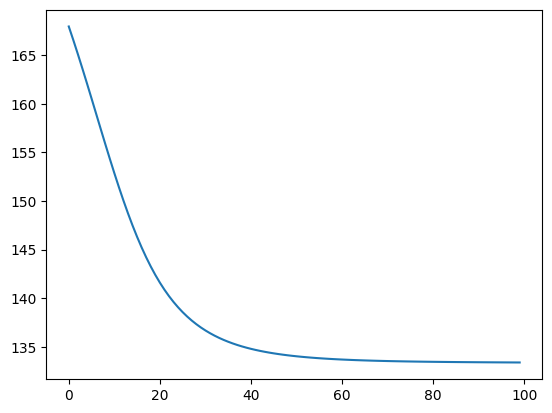

In [36]:
nn = NeuralNetwork(X, y, lr=0.001)  # 定义模型
loss_list = []  # 存放损失数值变化

for i in range(100):
    nn.forward()  # 前向传播
    nn.backward()  # 反向传播
    loss = np.sum((y - nn.output_layer) ** 2)  # 计算平方损失
    loss_list.append(loss)

print("final loss:", loss)
plt.plot(loss_list)  # 绘制 loss 曲线变化图